In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the file

In [2]:
data = pd.read_csv('C://Users//DELL//Downloads//Financial Risk of Loan Approval//Loan.csv')
data

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,01-01-2018,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,02-01-2018,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,03-01-2018,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,04-01-2018,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,05-01-2018,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29-09-2072,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,30-09-2072,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,01-10-2072,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,02-10-2072,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


### Checking Null Values

In [3]:
data.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

### Checking for correalted columns & removing it

<AxesSubplot:>

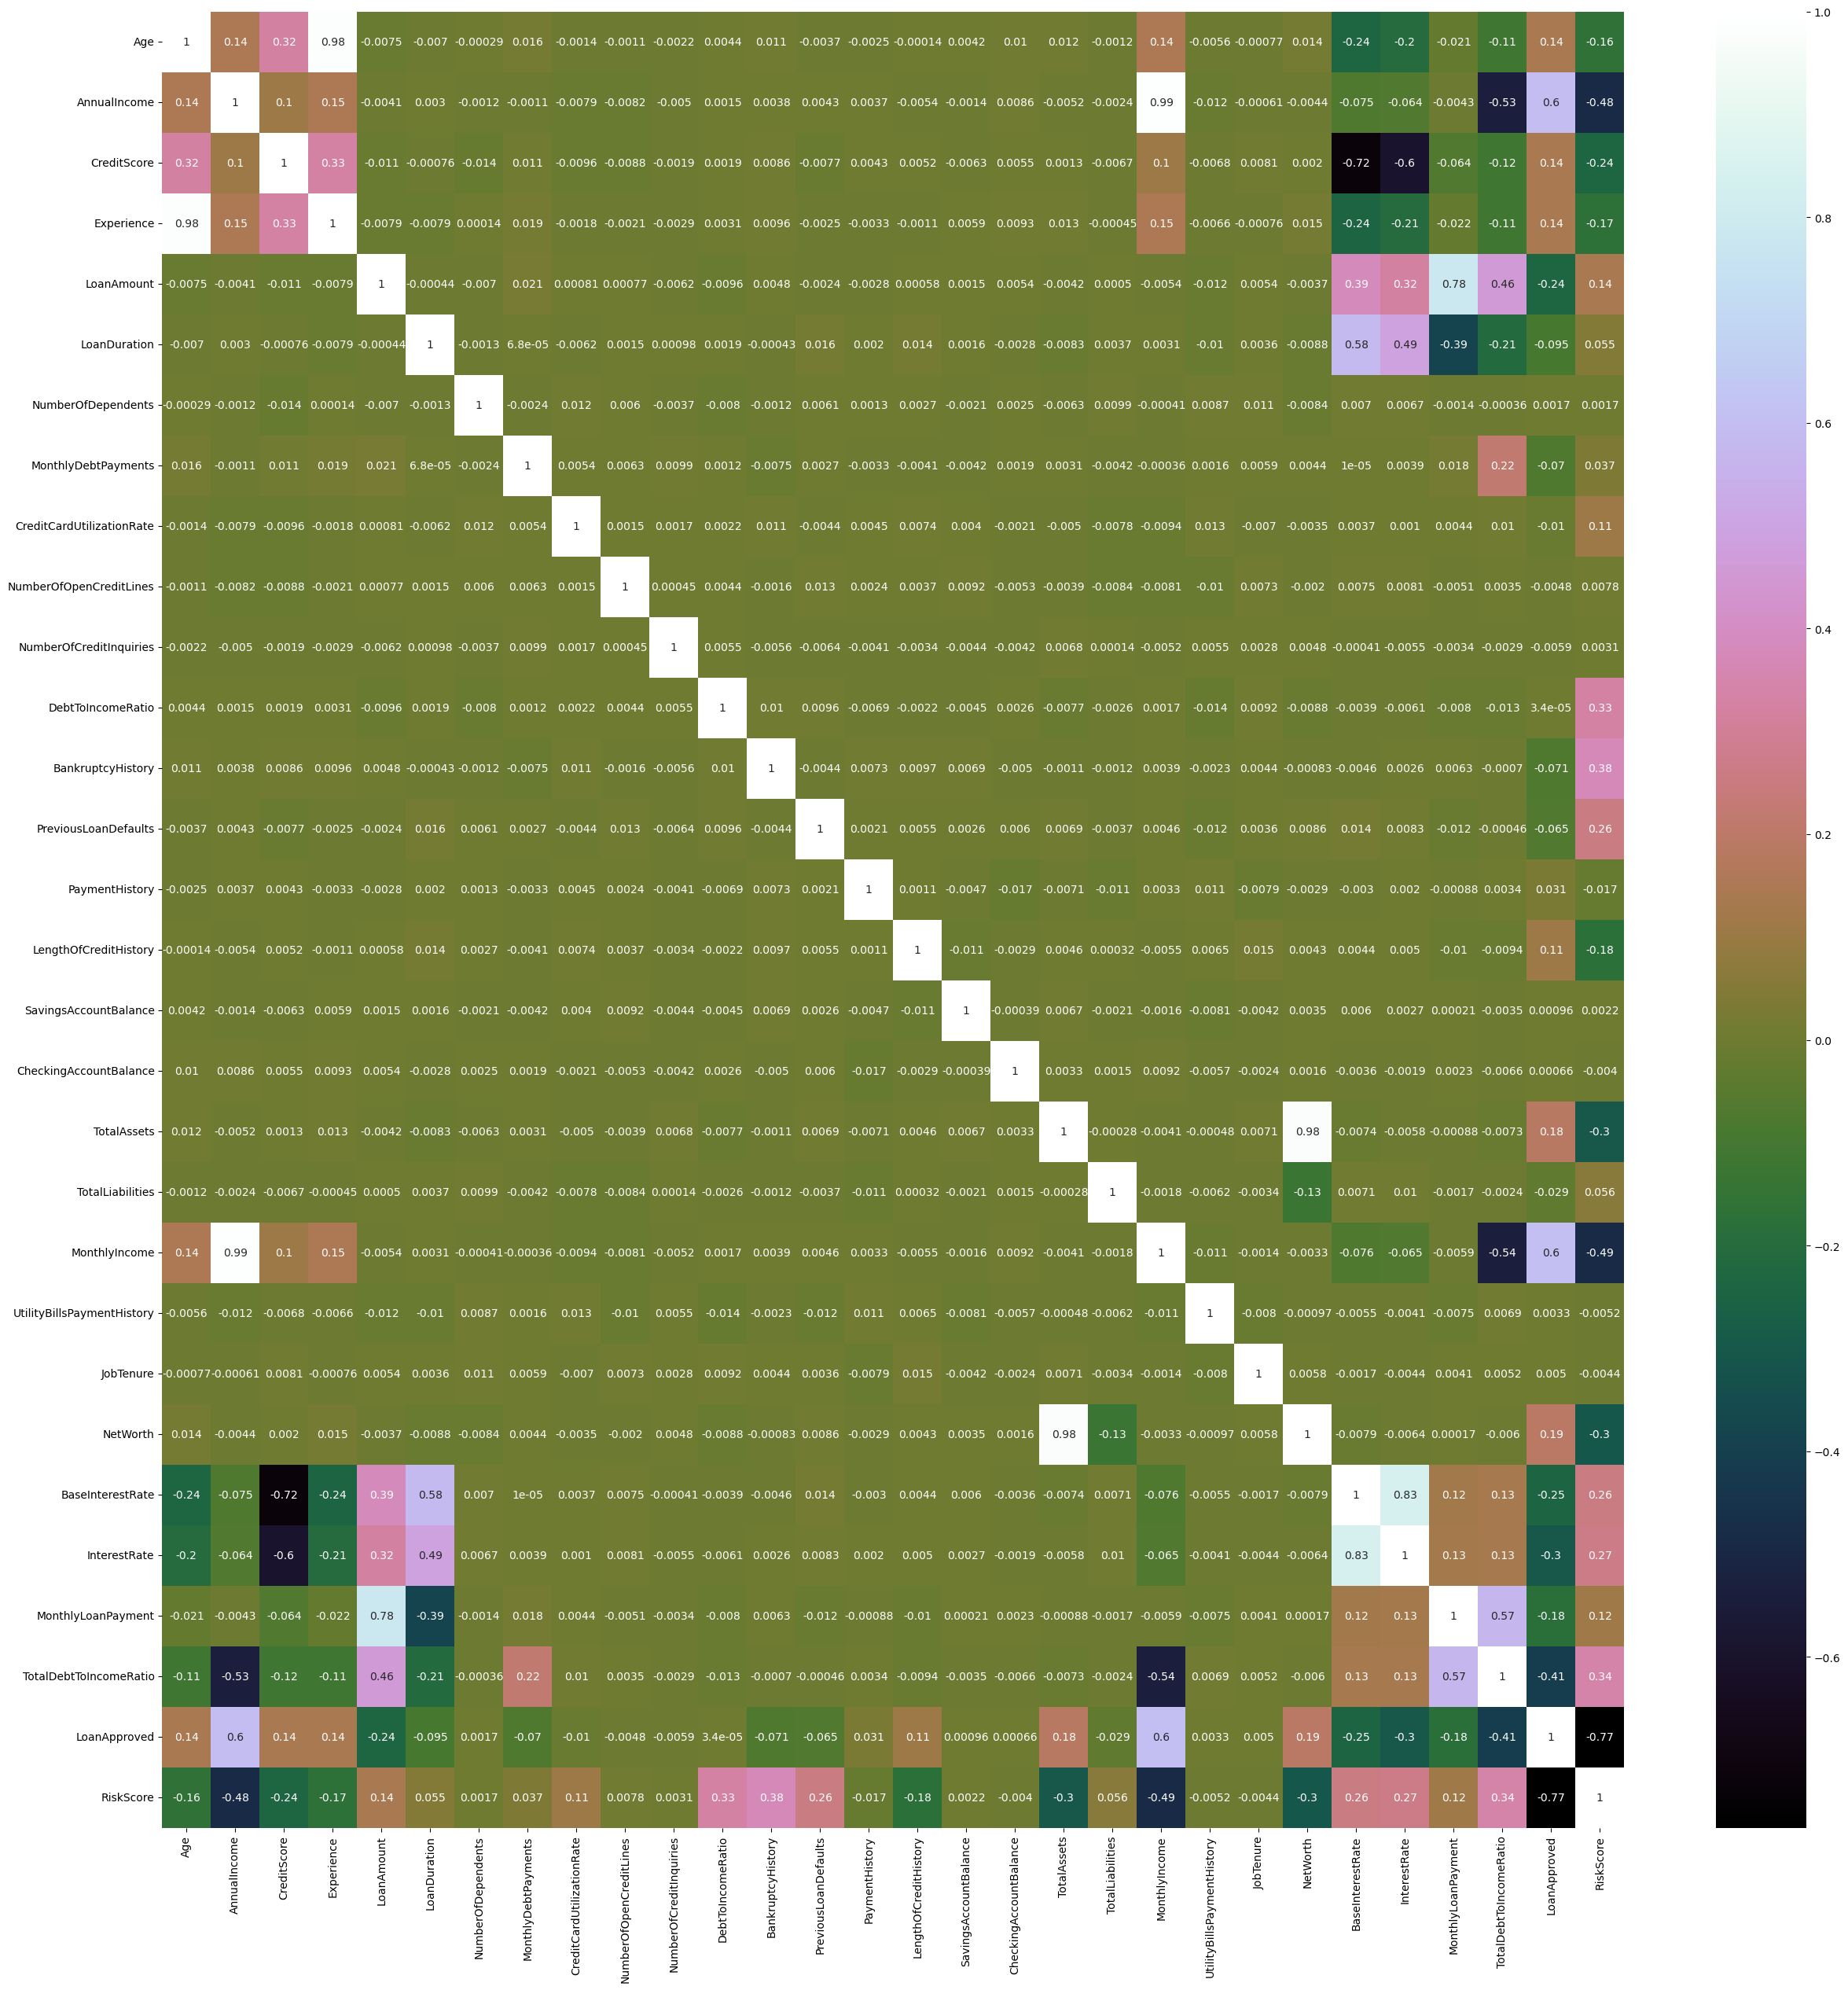

In [4]:
a = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(a,annot=True,cmap='cubehelix')


In [5]:
# Correlated Columns
corr_col=a[(a>0.70) & (a!=1.0)]
corr_col.columns[corr_col.any()]

Index(['Age', 'AnnualIncome', 'Experience', 'LoanAmount', 'TotalAssets',
       'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment'],
      dtype='object')

### I could see the correlation between:
1. Age and Experience
2. AnnualIncome and MonthlyIncome
3. LoanAmount and MonthlyLoanPayment
4. TotalAssets and NetWorth
5. BaseInterestRate and InterestRate

### So I am gonna remove Age, MonthlyIncome, NetWorth, InterestRate,and MonthlyLoanPayment along with Application date which is no need

In [6]:
data = data.drop(columns=['ApplicationDate','Age','MonthlyLoanPayment','InterestRate','NetWorth','MonthlyIncome'])
data

,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,BaseInterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,39948,617,Employed,Master,22,13152,48,Married,2,Own,...,7632,1202,146111,19183,0.724972,11,0.199652,0.181077,0,49.0
1,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,...,4627,3460,53204,9595,0.935132,3,0.207045,0.389852,0,52.0
2,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,...,886,895,25176,128874,0.872241,6,0.217627,0.462157,0,52.0
3,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,...,1675,1217,104822,5370,0.896155,5,0.300398,0.313098,0,54.0
4,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,...,1555,4981,244305,17286,0.941369,5,0.197184,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,High School,19,24521,36,Married,3,Rent,...,235,3429,80969,25642,0.826217,1,0.216021,0.627741,0,55.0
19996,49246,567,Employed,Associate,33,25818,36,Married,5,Rent,...,6910,183,69571,5569,0.816618,3,0.227318,0.334418,0,54.0
19997,48958,645,Employed,Bachelor,20,37033,72,Married,3,Mortgage,...,2175,746,108316,4653,0.887216,3,0.229533,0.357227,0,45.0
19998,41025,560,Employed,High School,36,14760,72,Married,3,Own,...,3037,260,22085,11485,0.843787,5,0.249760,0.408678,0,59.0


### EDA

In [7]:
str_data = data.select_dtypes('object')
#Seperating string columns

num_data = data.select_dtypes(['int','float'])
#Seperating numeric columns

### Count of each character columns

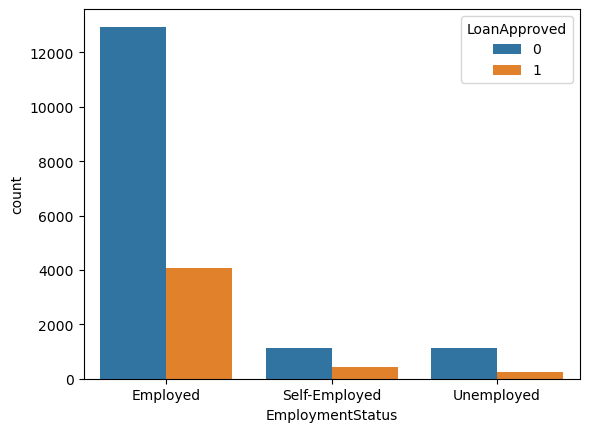

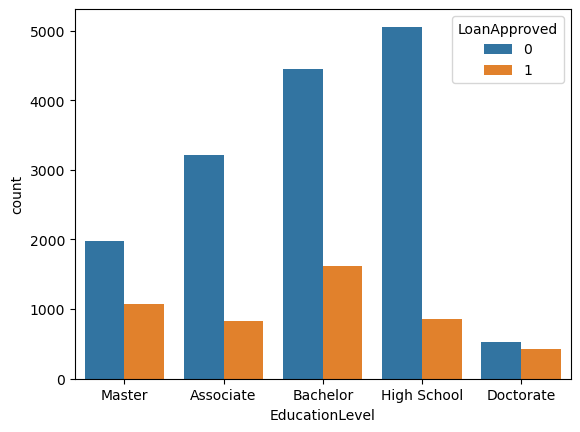

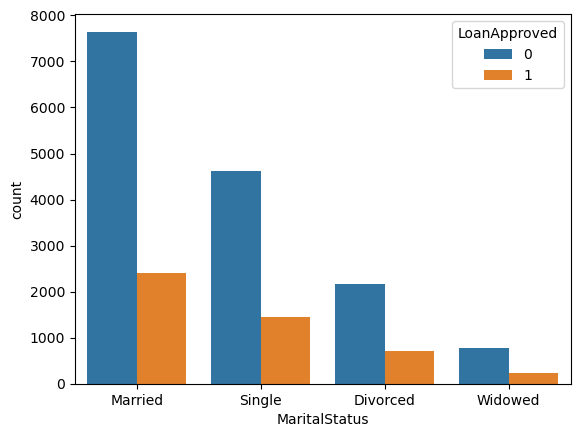

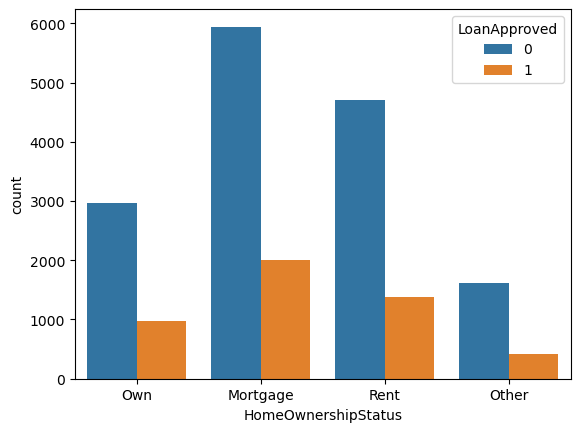

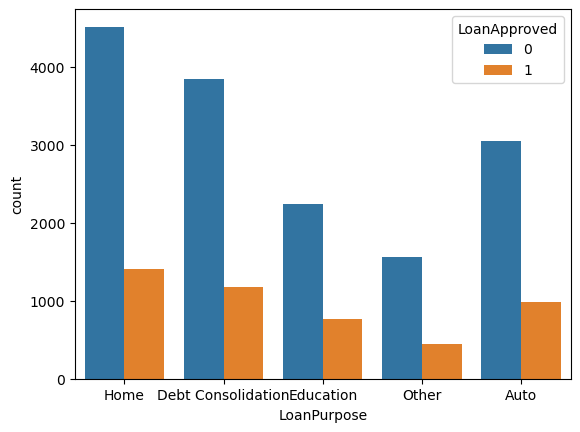

In [8]:
for i in str_data.columns:
    sns.countplot(data=data,x = data[i],hue='LoanApproved')
    plt.show()    

### Line plot of numeric variables with Risk score as x and classifying the plot based on Loan Approval

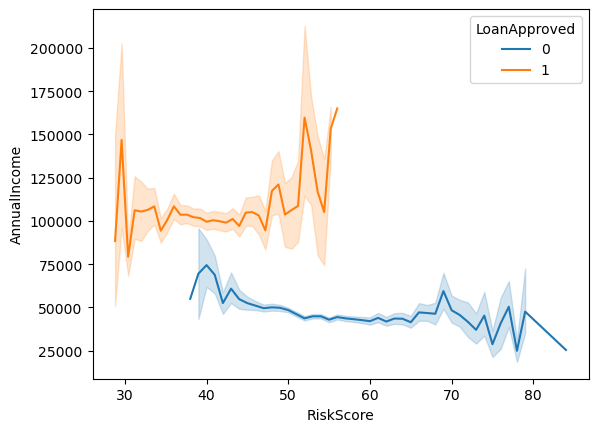

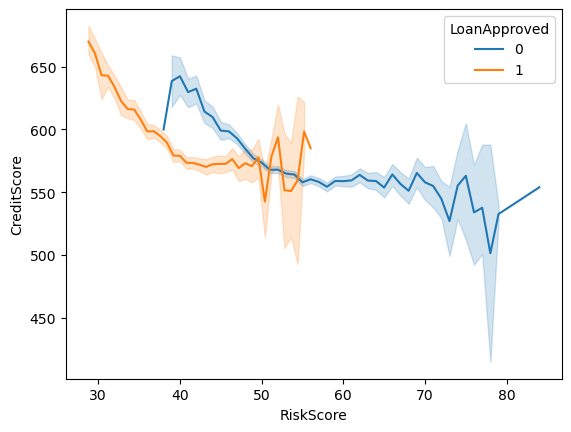

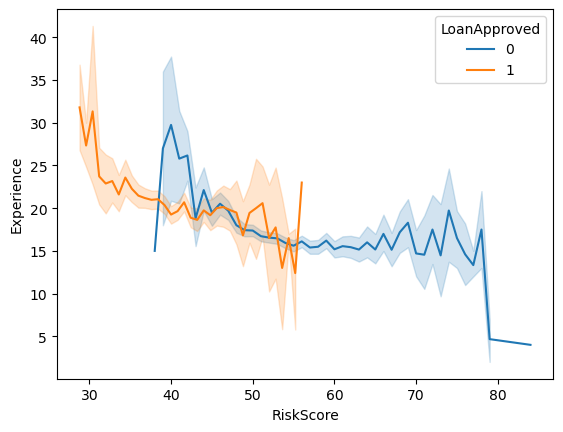

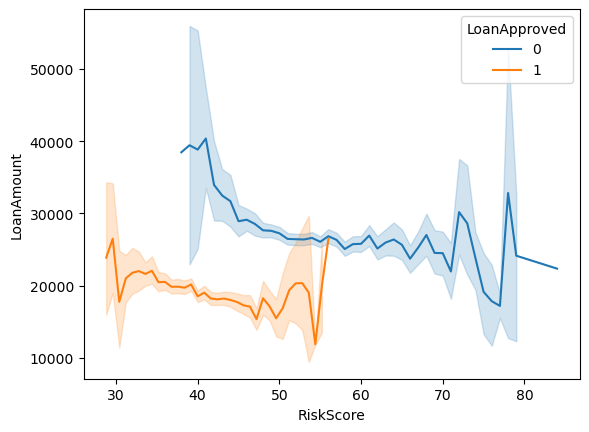

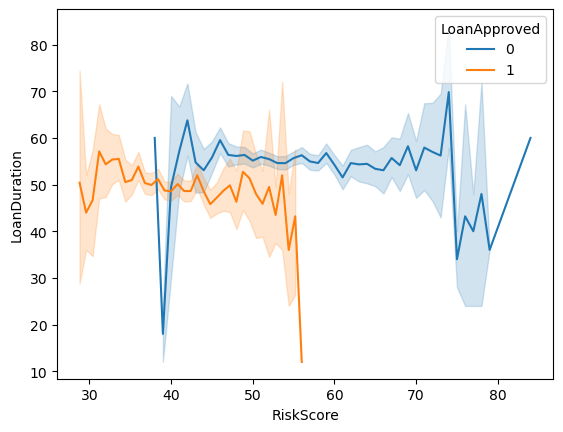

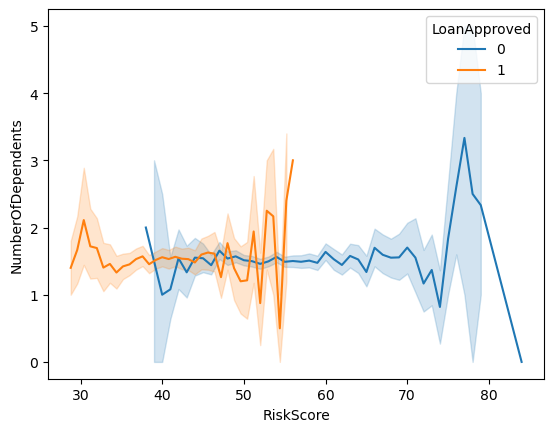

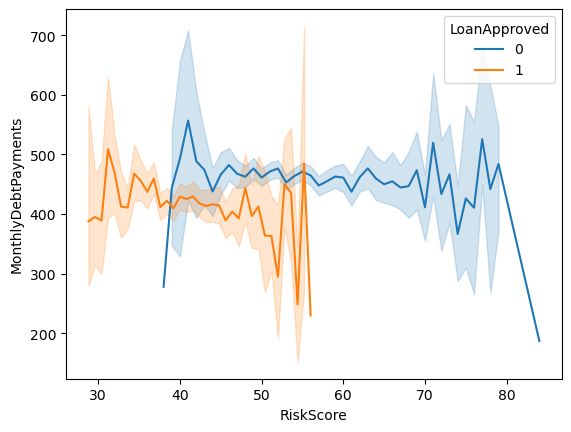

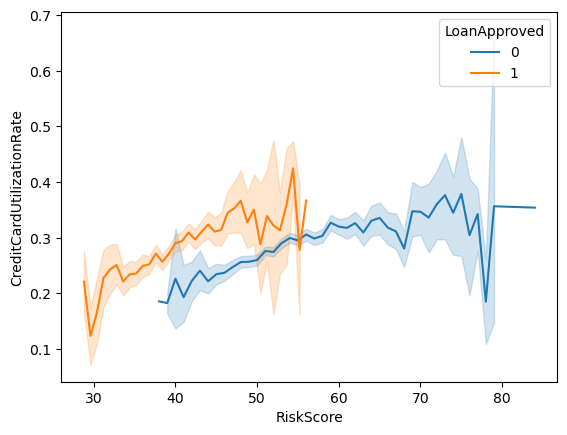

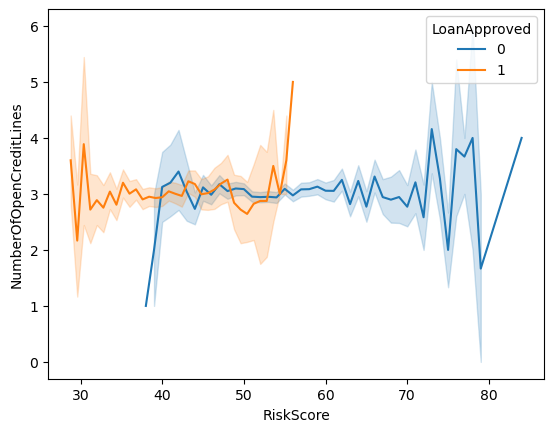

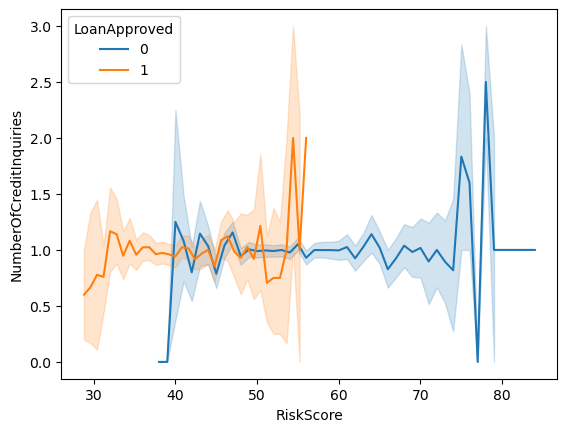

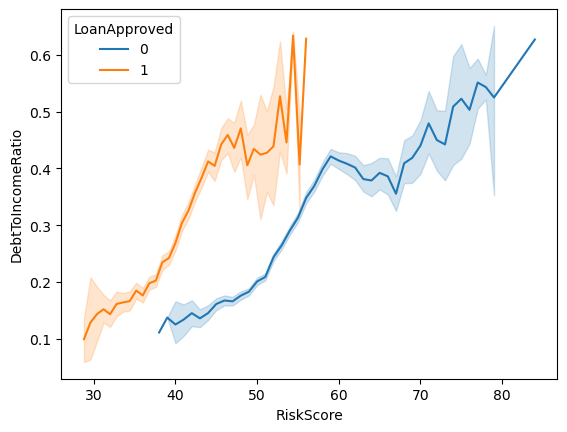

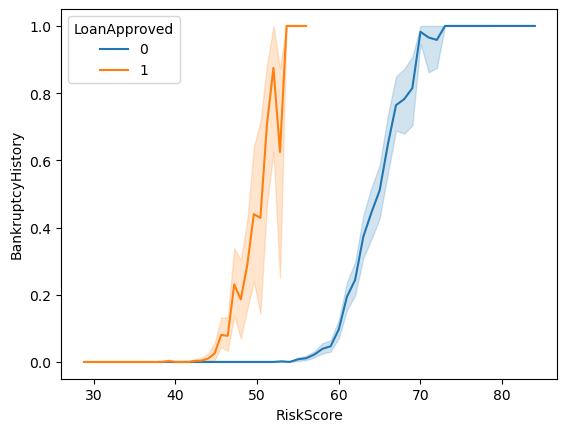

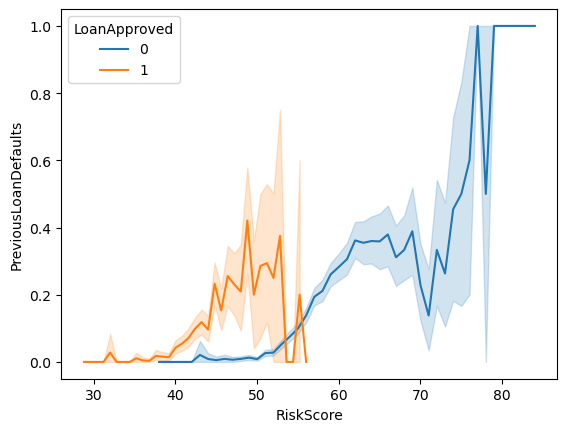

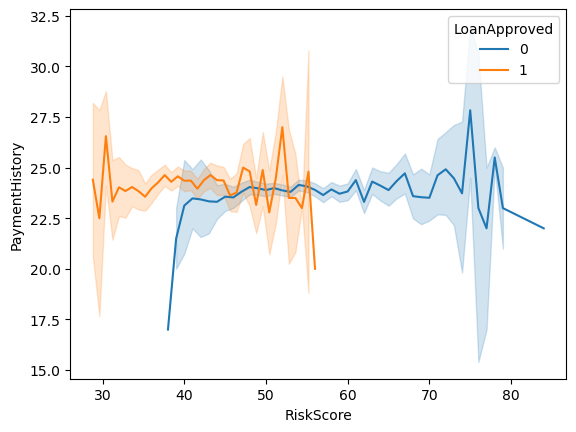

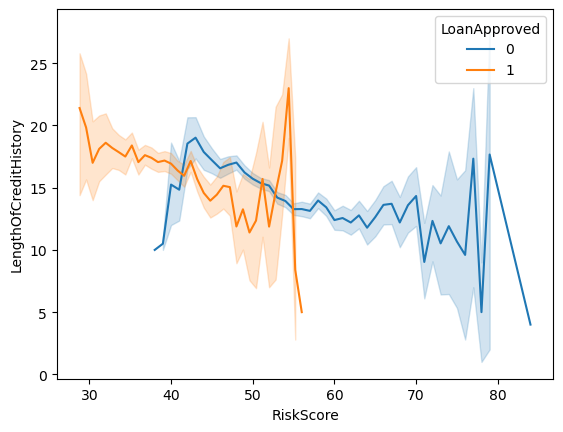

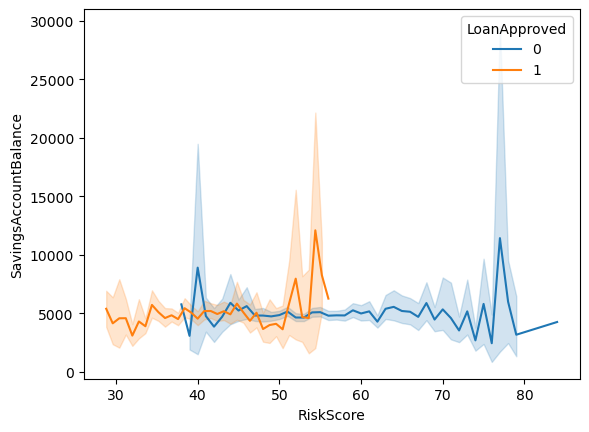

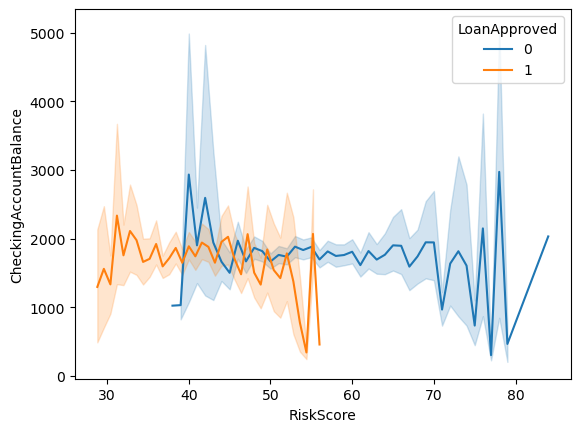

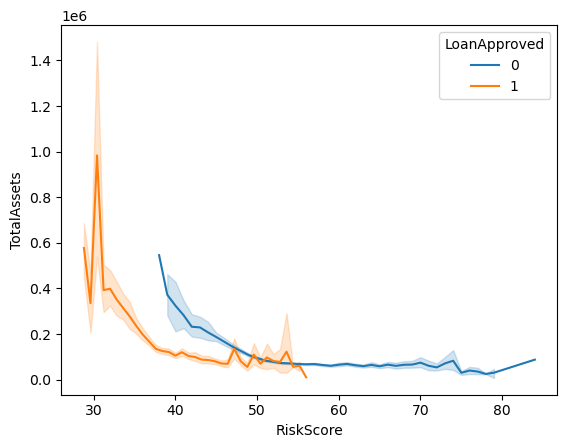

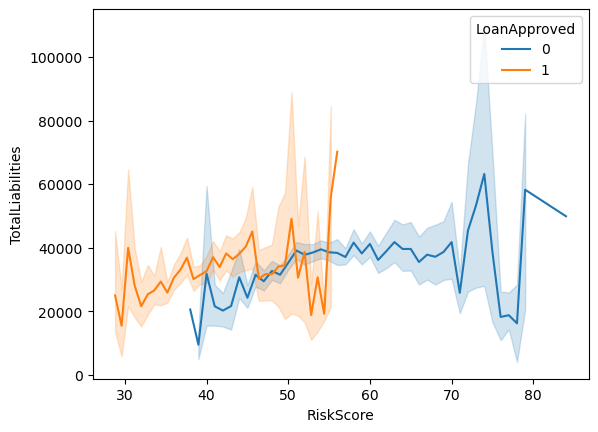

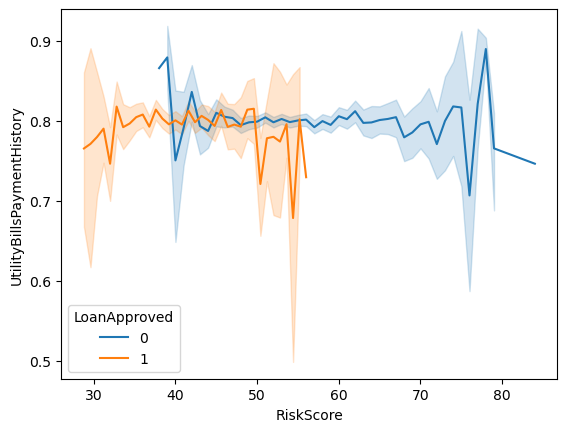

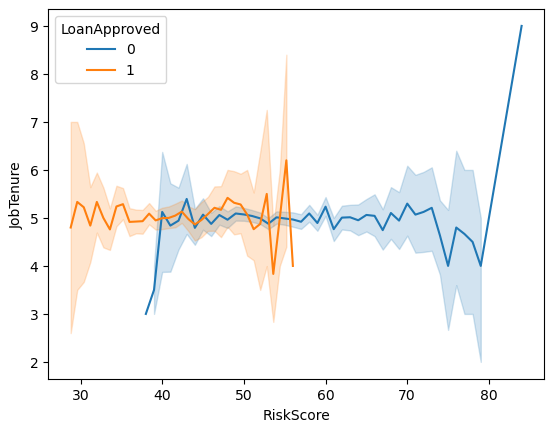

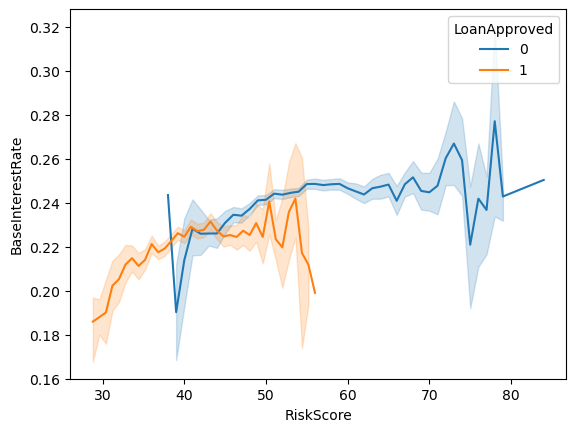

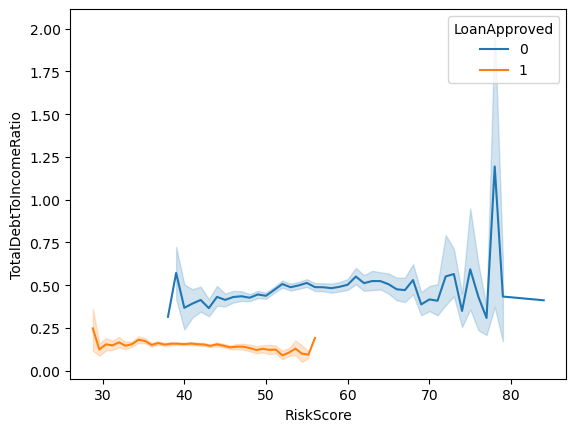

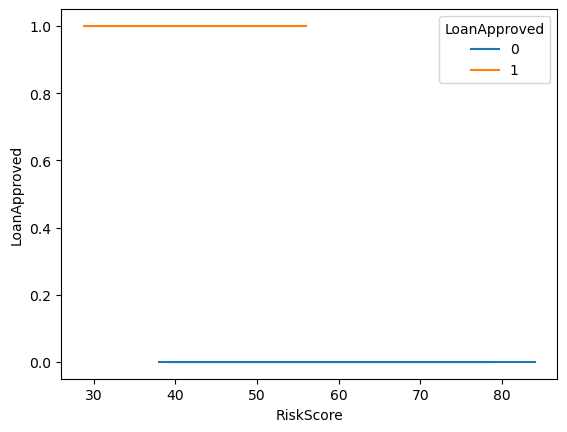

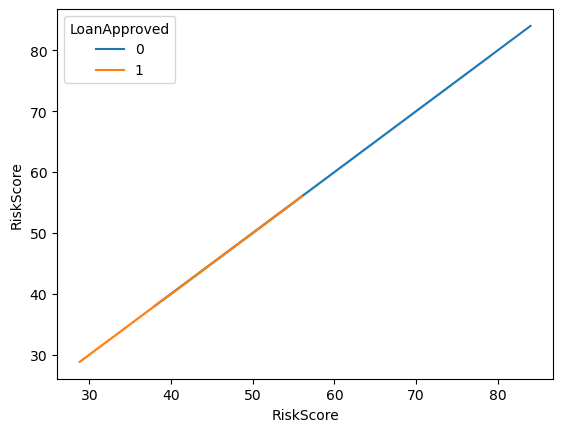

In [9]:
for i in num_data.columns:
    sns.lineplot(data=data,x='RiskScore',y= data[i],hue='LoanApproved')
    plt.show() 

### Label Encoding

In [10]:
for i in str_data.columns:
    data[i] = data[i].astype('category').cat.codes

In [11]:
data

,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,BaseInterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,39948,617,0,4,22,13152,48,1,2,2,...,7632,1202,146111,19183,0.724972,11,0.199652,0.181077,0,49.0
1,39709,628,0,0,15,26045,48,2,1,0,...,4627,3460,53204,9595,0.935132,3,0.207045,0.389852,0,52.0
2,40724,570,0,1,26,17627,36,1,2,3,...,886,895,25176,128874,0.872241,6,0.217627,0.462157,0,52.0
3,69084,545,0,3,34,37898,96,2,1,0,...,1675,1217,104822,5370,0.896155,5,0.300398,0.313098,0,54.0
4,103264,594,0,0,17,9184,36,1,1,0,...,1555,4981,244305,17286,0.941369,5,0.197184,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,0,3,19,24521,36,1,3,3,...,235,3429,80969,25642,0.826217,1,0.216021,0.627741,0,55.0
19996,49246,567,0,0,33,25818,36,1,5,3,...,6910,183,69571,5569,0.816618,3,0.227318,0.334418,0,54.0
19997,48958,645,0,1,20,37033,72,1,3,0,...,2175,746,108316,4653,0.887216,3,0.229533,0.357227,0,45.0
19998,41025,560,0,3,36,14760,72,1,3,2,...,3037,260,22085,11485,0.843787,5,0.249760,0.408678,0,59.0


### Splitting data into train and test data

In [12]:
x = data.drop(columns=['RiskScore'])
x

,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,BaseInterestRate,TotalDebtToIncomeRatio,LoanApproved
0,39948,617,0,4,22,13152,48,1,2,2,...,9,7632,1202,146111,19183,0.724972,11,0.199652,0.181077,0
1,39709,628,0,0,15,26045,48,2,1,0,...,9,4627,3460,53204,9595,0.935132,3,0.207045,0.389852,0
2,40724,570,0,1,26,17627,36,1,2,3,...,22,886,895,25176,128874,0.872241,6,0.217627,0.462157,0
3,69084,545,0,3,34,37898,96,2,1,0,...,10,1675,1217,104822,5370,0.896155,5,0.300398,0.313098,0
4,103264,594,0,0,17,9184,36,1,1,0,...,27,1555,4981,244305,17286,0.941369,5,0.197184,0.070210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,0,3,19,24521,36,1,3,3,...,7,235,3429,80969,25642,0.826217,1,0.216021,0.627741,0
19996,49246,567,0,0,33,25818,36,1,5,3,...,28,6910,183,69571,5569,0.816618,3,0.227318,0.334418,0
19997,48958,645,0,1,20,37033,72,1,3,0,...,8,2175,746,108316,4653,0.887216,3,0.229533,0.357227,0
19998,41025,560,0,3,36,14760,72,1,3,2,...,13,3037,260,22085,11485,0.843787,5,0.249760,0.408678,0


In [13]:
y = data['RiskScore']
y

0        49.0
1        52.0
2        52.0
3        54.0
4        36.0
         ... 
19995    55.0
19996    54.0
19997    45.0
19998    59.0
19999    59.0
Name: RiskScore, Length: 20000, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 29)
(4000, 29)
(16000,)
(4000,)


### Regression Model

In [15]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rc = RandomForestRegressor()
rc = rc.fit(x_train,y_train)
rc_pred = rc.predict(x_test)
rc_acc = r2_score(y_test,rc_pred) * 100
print('Predicton of Test data :',rc_acc)

Predicton of Test data : 98.19381734328404


In [16]:
rc_pred1 = rc.predict(x_train)
rc_acc1 = r2_score(y_train,rc_pred1) * 100
print('Predicton of Train data :',rc_acc1)

Predicton of Train data : 99.72153231105256


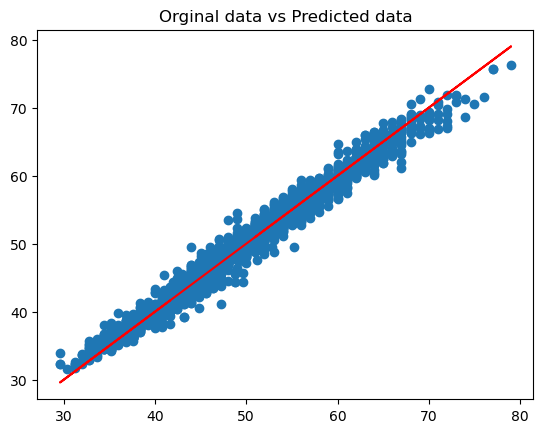

In [17]:
plt.scatter(y_test,rc_pred)
plt.plot(y_test,y_test,color='red')
plt.title('Orginal data vs Predicted data')
plt.show()

In [18]:
a =x.iloc[[14254,14255],:]
a

,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,BaseInterestRate,TotalDebtToIncomeRatio,LoanApproved
14254,60287,534,1,3,38,12641,72,1,3,0,...,21,16526,541,43636,45113,0.788275,2,0.260641,0.160982,0
14255,15000,532,1,3,12,13035,24,2,1,0,...,21,689,543,54348,55407,0.934960,7,0.222035,0.755946,0


In [19]:

x_new = np.array(a)
x_new

array([[6.02870000e+04, 5.34000000e+02, 1.00000000e+00, 3.00000000e+00,
        3.80000000e+01, 1.26410000e+04, 7.20000000e+01, 1.00000000e+00,
        3.00000000e+00, 0.00000000e+00, 4.18000000e+02, 7.10632514e-01,
        2.00000000e+00, 3.00000000e+00, 6.16637220e-02, 0.00000000e+00,
        3.00000000e+00, 0.00000000e+00, 2.60000000e+01, 2.10000000e+01,
        1.65260000e+04, 5.41000000e+02, 4.36360000e+04, 4.51130000e+04,
        7.88275317e-01, 2.00000000e+00, 2.60641000e-01, 1.60982022e-01,
        0.00000000e+00],
       [1.50000000e+04, 5.32000000e+02, 1.00000000e+00, 3.00000000e+00,
        1.20000000e+01, 1.30350000e+04, 2.40000000e+01, 2.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 2.70000000e+02, 3.75735067e-01,
        3.00000000e+00, 1.00000000e+00, 3.62150524e-01, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 2.20000000e+01, 2.10000000e+01,
        6.89000000e+02, 5.43000000e+02, 5.43480000e+04, 5.54070000e+04,
        9.34959630e-01, 7.00000000e+00,

In [20]:
rc.predict(x_new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([54.52, 58.79])